<a href="https://colab.research.google.com/github/xpdlaldam/nlp/blob/master/stemming_and_lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 6/10/2024 13. Stemming & Lemmatization
## Stemming is very crude as it just chops off the end of the word => the result is not necessarily a real word ex) better -> better

## Lemmatization is more sophisticated as it uses actual rules of language => the true root word will be returned ex) better -> good

## Parts-of-Speech (POS) matters as "going" can be a noun but when the root form is "go" it is not a noun

lemmatizer.lemmatize("mice") # returns "mouse"

lemmatizer.lemmatize("going", pos=wordnet.NOUN) # returns "going"
lemmatizer.lemmatize("going", pos=wordnet.VERB) # returns 'go'





# 14.Stemming & Lemmatization Demo 6/16/2024

In [ ]:
import nltk
from nltk.stem import PorterStemmer

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
porter = PorterStemmer()

In [ ]:
porter.stem("walking")

In [ ]:
porter.stem("walked")

In [ ]:
porter.stem("ran") # wrong stemming

'ran'

In [ ]:
sentence = "Lemmatization is more sophisticated than stemming".split()
for token in sentence:
  # print(porter.stem(token), end=" ") # end = " " is to print the result in a single line
  print(porter.stem(token))

lemmat
is
more
sophist
than
stem


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatizer.lemmatize("walking") # default: pos=wordnet.NOUN

'walking'

In [ ]:
lemmatizer.lemmatize("walking", pos=wordnet.VERB)

'walk'

In [ ]:
lemmatizer.lemmatize("ran", pos=wordnet.VERB)

'run'

In [ ]:
lemmatizer.lemmatize("was", pos=wordnet.VERB)

'be'

In [ ]:
lemmatizer.lemmatize("better", pos=wordnet.ADJ)

'good'

In [ ]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith("J"):
    return wordnet.ADJ
  elif treebank_tag.startswith("V"):
    return wordnet.VERB
  elif treebank_tag.startswith("N"):
    return wordnet.NOUN
  elif treebank_tag.startswith("R"):
    return wordnet.ADJ
  else:
    return wordnet.NOUN

In [ ]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentence = "Donald Trump has a devoted following".split()
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('Donad', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN')]

In [ ]:
for word, tag in words_and_tags:
  lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
  print(lemma, end=" ")

Donad Trump have a devote following 

In [ ]:
sentence = "The cat was following the bird as it flew by".split()
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('The', 'DT'),
 ('cat', 'NN'),
 ('was', 'VBD'),
 ('following', 'VBG'),
 ('the', 'DT'),
 ('bird', 'NN'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('flew', 'VBD'),
 ('by', 'IN')]

In [ ]:
for word, tag in words_and_tags:
  lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
  print(lemma, end=" ")

The cat be follow the bird a it fly by 

# 15. Count Vectorizer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [ ]:
## download data for nltk
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!gsutil cp gs://dataset-uploader/bbc/bbc-text.csv .

Copying gs://dataset-uploader/bbc/bbc-text.csv...
- [1 files][  4.8 MiB/  4.8 MiB]                                                
Operation completed over 1 objects/4.8 MiB.                                      


In [ ]:
df = pd.read_csv("bbc-text.csv")

In [ ]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
inputs = df['text']
labels = df['category']

<Axes: >

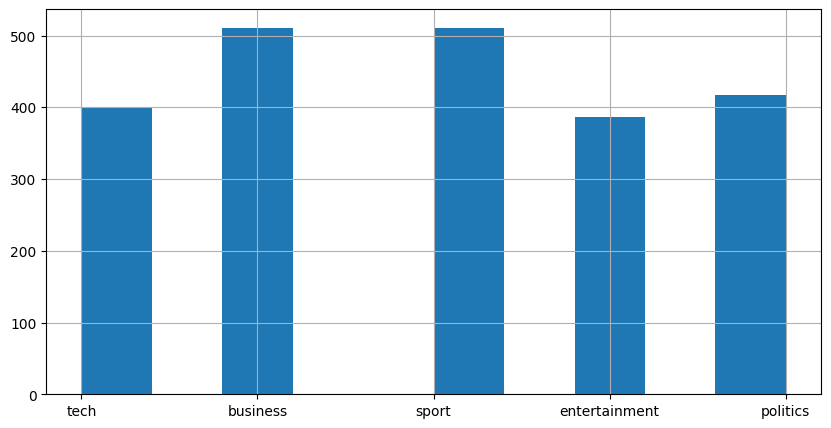

In [ ]:
labels.hist(figsize=(10, 5))

In [ ]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
    inputs, labels, random_state=123)

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [ ]:
Xtrain

<1668x25997 sparse matrix of type '<class 'numpy.int64'>'
	with 336528 stored elements in Compressed Sparse Row format>

In [ ]:
(Xtrain != 0).sum()

336528

In [ ]:
# what percentage of values are non-zero?
# < 1% => most values are non-zeros
# thus, makes sense to use a sparse matrix
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007760718378407248

In [ ]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9766606822262118


In [ ]:
# using stopwords (default: stopwords are not removed)
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9940047961630696
test score: 0.9730700179533214


In [ ]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [ ]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()

  # call an object as if it were a function
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [ ]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9946043165467626
test score: 0.9730700179533214


In [ ]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [ ]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score: 0.9748653500897666


In [ ]:
def simple_tokenizer(s):
  return s.split()

In [ ]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9934052757793765
test score: 0.9694793536804309


## TF-IDF Theory

In [ ]:
### concept
# Term Frequency - Inverse Document Frequency
# to avoid stopwords so that it doesn't over represent the documnet
# term frequency / document frequency

### tfidf(t, d) = tf(t, d) * idf(t)
## tf(t, d)
# number of times a term appears in an document
# t is the term count and d is the ith document ex) document 1 has the word "hi" 3 times and document 2 has the word "bye" 4 times
# the t is the only argument in idf as the document count only depends on the term t
# i.e. tf(t, d) = # of times t appears in d => same result by using CountVectorizer; if we have V unique terms and N documents the dimension will be N by V

## idf(t) = log(N/N(t)), where N = total # of documnets; N(t) = # of documents term t appears in
# a measure of how rare a term is across all documents
# why log? nomotinic: if N/N(t) increases, so will its log
# TF-IDF decreases if t appears in more documents
# to squash big numbers ex) if N = 10M and N(t) = 1, then TF-IDF explodes to 1M but with log it goes down to 13.8

# TF-IDF Recommender System

In [1]:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2024-11-13 05:07:08--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  --.-KB/s    in 0.1s    

2024-11-13 05:07:09 (49.4 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [3]:
df = pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
df['genres'].unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]',
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]'],
      dtype=object)

In [5]:
df['keywords'].unique()

array(['[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]',
       '[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one\'s life"}, {"id": 2052, "name": "traitor"}, {"id": 2580,

In [7]:
j = json.loads(df.iloc[0]['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [10]:
[jj['name'] for jj in j]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [11]:
[jj['name'].split() for jj in j] # splits into words w/ each of them stored in a list of lists

[['Action'], ['Adventure'], ['Fantasy'], ['Science', 'Fiction']]

In [14]:
[''.join(jj['name'].split()) for jj in j] # remove white space

['Action', 'Adventure', 'Fantasy', 'ScienceFiction']

In [15]:
' '.join(''.join(jj['name'].split()) for jj in j) # make all genres in a single string

'Action Adventure Fantasy ScienceFiction'

In [16]:
# convert the relevant data for each movie into a single string
# to be ingested by TfidfVectorizer
def genres_and_keywords_to_string(row):
  genres = json.loads(row['genres'])
  genres = ' '.join(''.join(j['name'].split()) for j in genres)

  keywords = json.loads(row['keywords'])
  keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
  return "%s %s" % (genres, keywords)

In [18]:
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...


In [19]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000) # max_features: limits the number of columns in the final matrix i.e. discards less frequent terms

In [20]:
# create a data matrix from the overviews
X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [21]:
# generate a mapping from movie title -> index (in df)
# why are we doing this? b/c our X matrix doesn't tell you which movie. It's just numbers so we need to have a mapping that tells which movie it is
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [23]:
idx = movie2idx['Avatar']
idx

0

In [24]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [25]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# compute similarity between query and every vector in X
# shape will be 1 (query.shape[0]) by 4_803 (X.shape[0])
# 0 means there are no common terms b/w two movies => dot product = 0
scores = cosine_similarity(query, X)
scores

array([[1.        , 0.03456117, 0.03694098, ..., 0.01662147, 0.        ,
        0.        ]])

In [27]:
# currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()

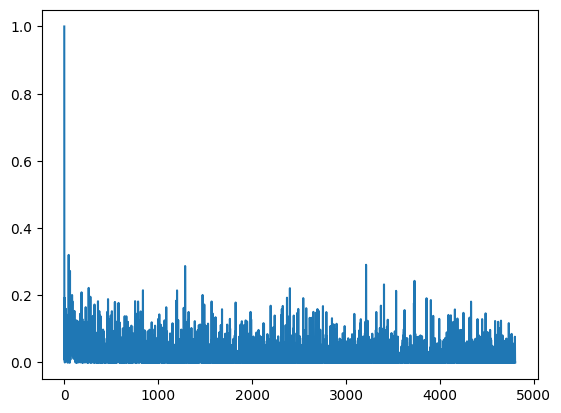

In [28]:
plt.plot(scores) # the spike at 1 is the query movie as the cosine similarity b/w two identical vector is 1

In [29]:
# reason for doing argsort: we don't care about the scores we only care about the ranks
# -scores: sort by descending order
(-scores).argsort()

array([   0,   47, 3214, ..., 2570, 2574, 4802])

In [30]:
scores[(-scores).argsort()]

array([1.        , 0.320145  , 0.29075621, ..., 0.        , 0.        ,
       0.        ])

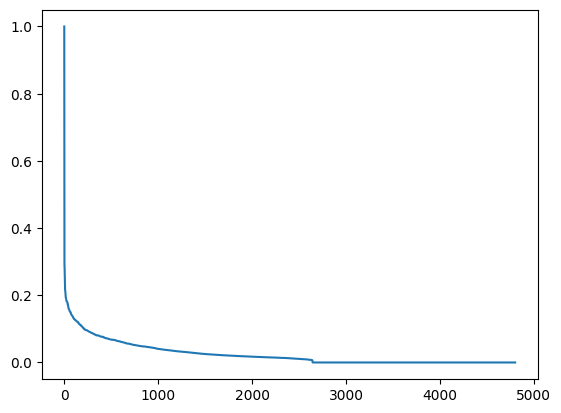

In [31]:
# interpretation: most movies are unrelated to the query movie
plt.plot(scores[(-scores).argsort()])

In [33]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:6] # 0 is the query movie itself so start from 1

# convert indices back to titles
df['title'].iloc[recommended_idx]

,title
47,Star Trek Into Darkness
3214,Barbarella
1287,A Monster in Paris
61,Jupiter Ascending
3730,Cargo


In [35]:
# create a function that generates recommendations
def recommend(title):
  # get the row in the dataframe for this movie
  idx = movie2idx[title]
  if type(idx) == pd.Series: # if it's a pd.Series, it's the same title
    idx = idx.iloc[0]

  # calculate the pairwise similarities for this movie
  query = X[idx]
  scores = cosine_similarity(query, X)

  # currently the array is 1 x N, make it just a 1-D array
  scores = scores.flatten()

  # get the indexes of the highest scoring movies
  # get the first K recommendations
  # don't return itself!
  recommended_idx = (-scores).argsort()[1:6]

  # return the titles of the recommendations
  return df['title'].iloc[recommended_idx]

In [36]:
recommend(title='The Dark Knight Rises')

,title
65,The Dark Knight
119,Batman Begins
2864,Arbitrage
210,Batman & Robin
1740,Kick-Ass 2
